# Algoritmo de Deutsch

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere

In [2]:
qc1 = QuantumCircuit(2)
qc2 = QuantumCircuit(2)
qc3 = QuantumCircuit(2)
qc4 = QuantumCircuit(2)
qc5 = QuantumCircuit(4)
qc6 = QuantumCircuit(4)
qc2.cx(0, 1)
qc3.cx(0, 1)
qc3.x(1)
qc4.x(1)
qc6.cx(0, 3)
qc6.cx(2, 3)

In [3]:
orac1 = qc1.to_gate()
orac1.name = 'oráculo U_f'
orac2 = qc2.to_gate()
orac2.name = 'oráculo U_f'
orac3 = qc3.to_gate()
orac3.name = 'oráculo U_f'
orac4 = qc4.to_gate()
orac4.name = 'oráculo U_f'
orac5 = qc5.to_gate()
orac5.name = 'oráculo U_f'
orac6 = qc6.to_gate()
orac6.name = 'oráculo U_f'

In [4]:
# Forma clasica (preguntar al oraculo los valores fe f(x) e ir tabulando)
circuito0 = QuantumCircuit(2,1)
circuito0
circuito0.append(orac1,[0,1])
circuito0.measure(1,0)
circuito0.draw()

┌──────────────┐   
q_0: ┤0             ├───
     │  oráculo U_f │┌─┐
q_1: ┤1             ├┤M├
     └──────────────┘└╥┘
c_0: ═════════════════╩═

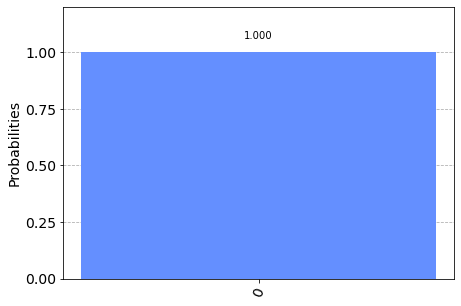

In [5]:
simulador = Aer.get_backend('qasm_simulator')
conteos = execute(circuito0, backend=simulador, shots=1000).result().get_counts()
plot_histogram(conteos)

In [11]:
#Forma cuántica de determinar si la funcion es constante o es balanceada. (Algoritmo de Deutsch-Jozsa)
circuito = QuantumCircuit(2,1)
circuito.x(1)
circuito.barrier()
circuito.h([0,1])
circuito.append(orac4, [0,1])
circuito.h([0])
circuito.measure(0, 0)
circuito.measure(1, 0)
circuito.draw()

░ ┌───┐┌──────────────┐┌───┐┌─┐
q_0: ──────░─┤ H ├┤0             ├┤ H ├┤M├
     ┌───┐ ░ ├───┤│  oráculo U_f │└┬─┬┘└╥┘
q_1: ┤ X ├─░─┤ H ├┤1             ├─┤M├──╫─
     └───┘ ░ └───┘└──────────────┘ └╥┘  ║ 
c_0: ═══════════════════════════════╩═══╩═

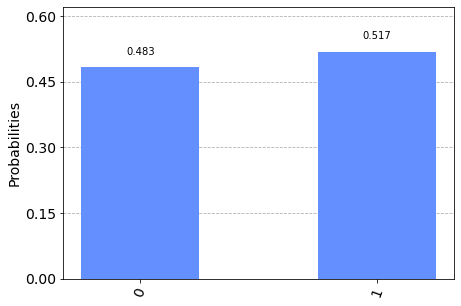

In [12]:
simulador = Aer.get_backend('qasm_simulator')
conteos = execute(circuito, backend=simulador, shots=1000).result().get_counts()
plot_histogram(conteos)

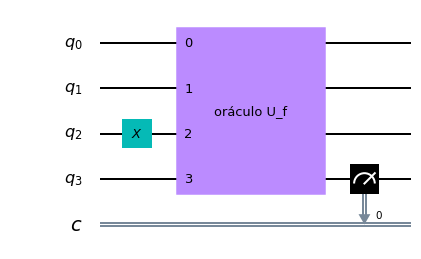

In [11]:
# Forma clasica (preguntar al oraculo los valores fe f(x) e ir tabulando)
circuito6 = QuantumCircuit(4,1)
circuito6.x(2)
circuito6.append(orac6,[0,1,2,3])
circuito6.measure(3,0)
circuito6.draw(output='mpl')

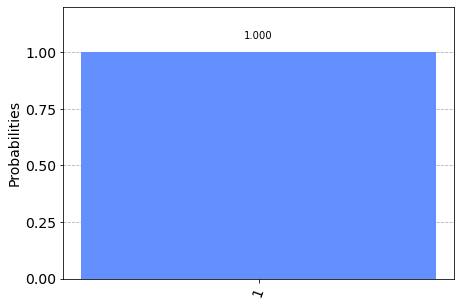

In [12]:
simulador = Aer.get_backend('qasm_simulator')
conteos6 = execute(circuito6, backend=simulador, shots=1000).result().get_counts()
plot_histogram(conteos6)

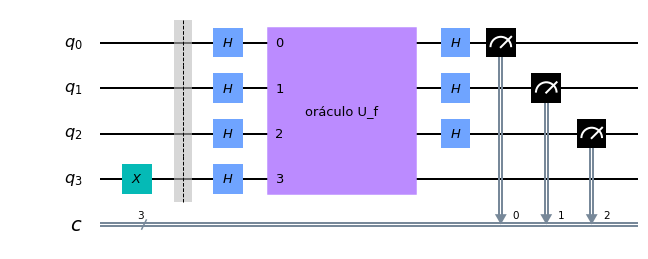

In [15]:
#Forma cuántica de determinar si la funcion es constante o es balanceada. (Algoritmo de Deutsch-Jozsa)
circuito6c = QuantumCircuit(4,3)
circuito6c.x(3)
circuito6c.barrier()
circuito6c.h([0,1,2,3])
circuito6c.append(orac6, [0,1,2,3])
circuito6c.h([0,1,2])
circuito6c.measure(0, 0)
circuito6c.measure(1, 1)
circuito6c.measure(2, 2)
circuito6c.draw(output='mpl')

In [16]:
conteos6c = execute(circuito6c, backend = simulador, shots = 1000).result().get_counts()
print(conteos6c)

{'101': 1000}


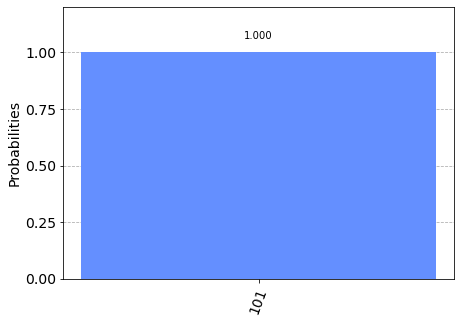

In [17]:
plot_histogram(conteos6c)